In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as col
from datetime import datetime
#%matplotlib inline

In [2]:
%matplotlib notebook

In [3]:
def mkcmap_2(): 
    red = '#e60000'
    blue = '#1a75ff'
    grey = '#bfbfbf'
    anglemap = col.LinearSegmentedColormap.from_list('anglemap', 
                                                     [grey, red, blue, grey], N=256, gamma=1)
    return anglemap

anglemap = mkcmap_2()

def localenergy(angles):
    mod = angles % (2*np.pi)
    dx = np.roll(mod, 1, axis=0) - mod
    dy = np.roll(mod, 1, axis=1) - mod
    return -(np.cos(dx) + np.cos(dy) + np.cos(np.roll(dx, -1, axis=1)) + np.cos(np.roll(dy, -1, axis=0)))

def plot_vec(angles, cmap = anglemap, energy = False):
    L = angles.shape[0]
    x = np.arange(0,L)
    y = np.arange(0,L)
    xg, yg = np.meshgrid(x, y)
    fig, axe = plt.subplots(figsize=(8,8))
    if energy:
        lenergy = localenergy(angles)
        lim = np.abs(lenergy).max()
        axe.pcolormesh(x, y, lenergy, vmin = -lim, vmax = lim, cmap = 'RdBu')
    axe.quiver(x, y, np.cos(angles), np.sin(angles), angles%(2*np.pi), 
               pivot = 'middle', angles='xy', scale_units='xy', scale=1., cmap=cmap)
    
    axe.set_xlim([0,L])
    axe.set_ylim([0,L])
    return fig, axe

In [8]:
dat = np.loadtxt('spins.dat')
L = dat.shape[1]
dat = dat.reshape(-1,L,L) % (2*np.pi)

<IPython.core.display.Javascript object>


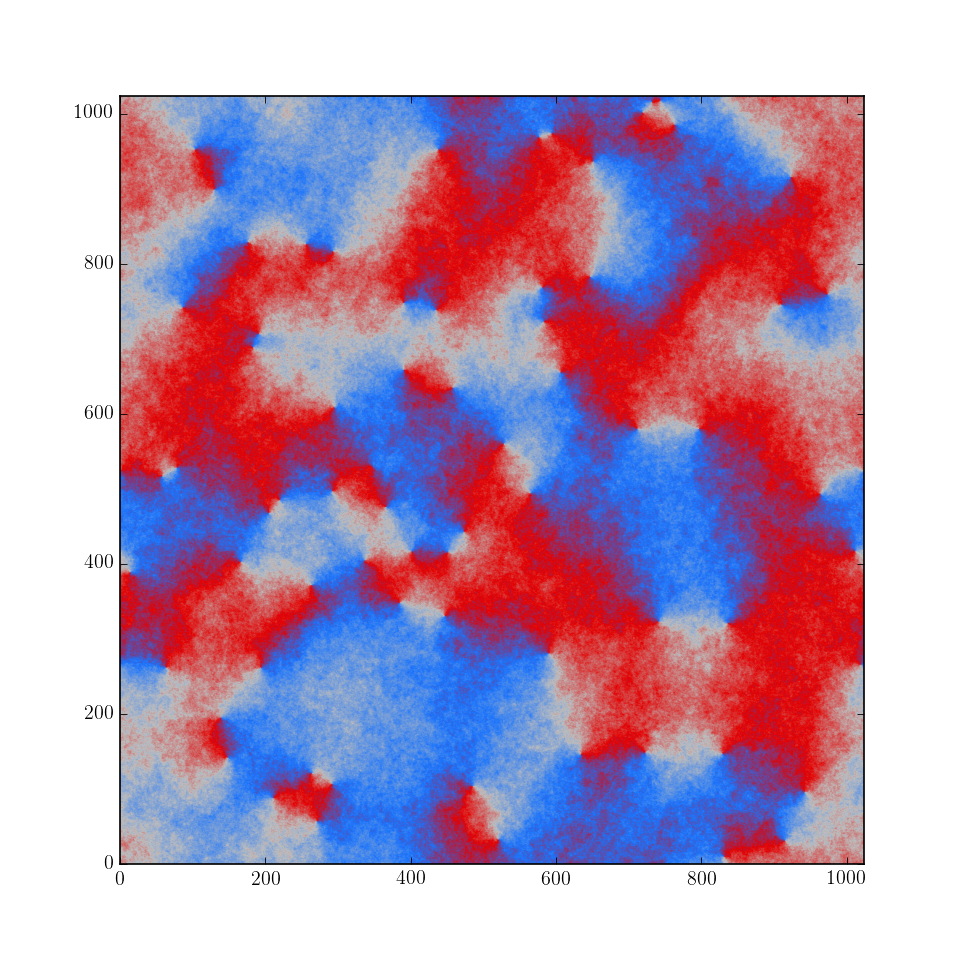

(<matplotlib.figure.Figure at 0x7f204ffe6650>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1fe0868b90>)

In [9]:
plot_vec(dat[0], energy = True)

<IPython.core.display.Javascript object>


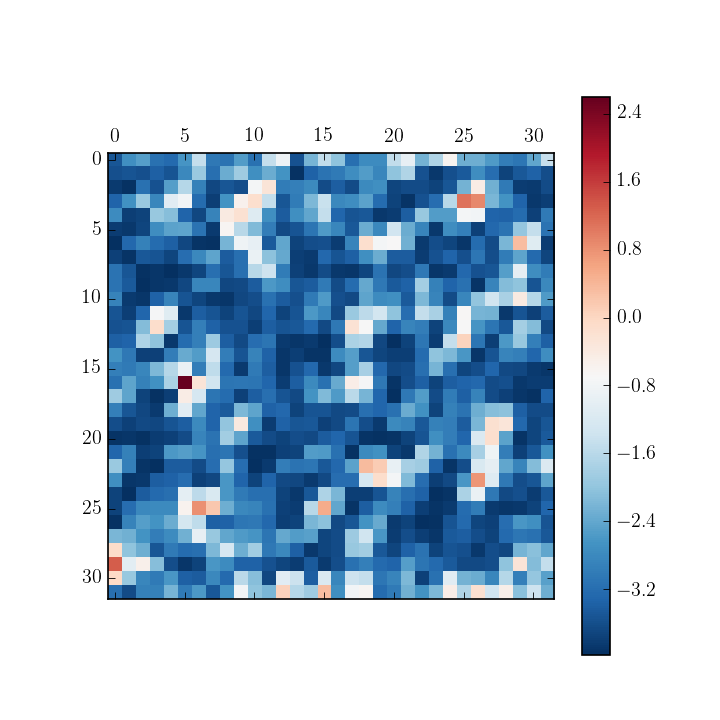

In [396]:
dx = np.roll(dat[0], 1, axis=0) - dat[0]
dy = np.roll(dat[0], 1, axis=1) - dat[0]
E = -(np.cos(dx) + np.cos(dy) + np.cos(np.roll(dx, -1, axis=1)) + np.cos(np.roll(dy, -1, axis=0)))
plt.matshow(E);plt.colorbar()

<IPython.core.display.Javascript object>


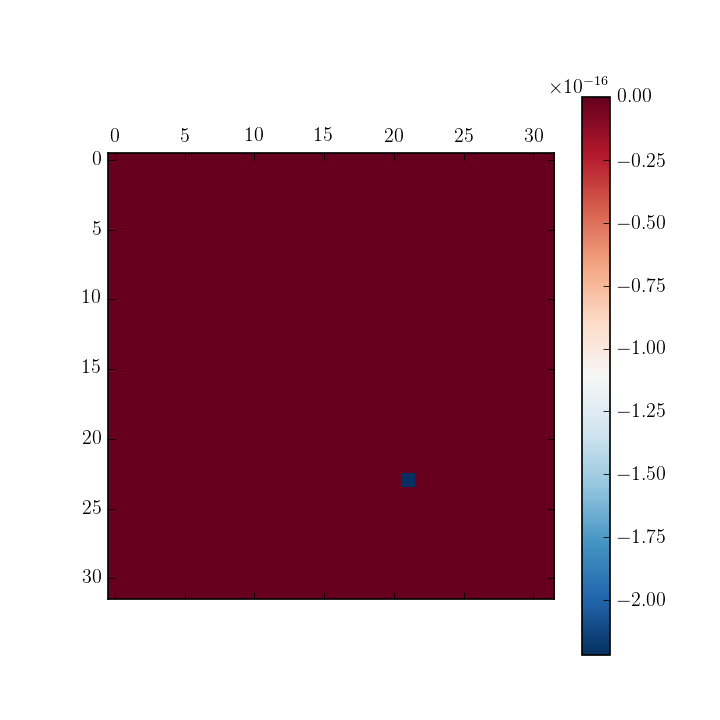

In [8]:
plt.matshow(vorticity(dat[-1]));plt.colorbar()

In [331]:
from scipy.misc import derivative

<IPython.core.display.Javascript object>


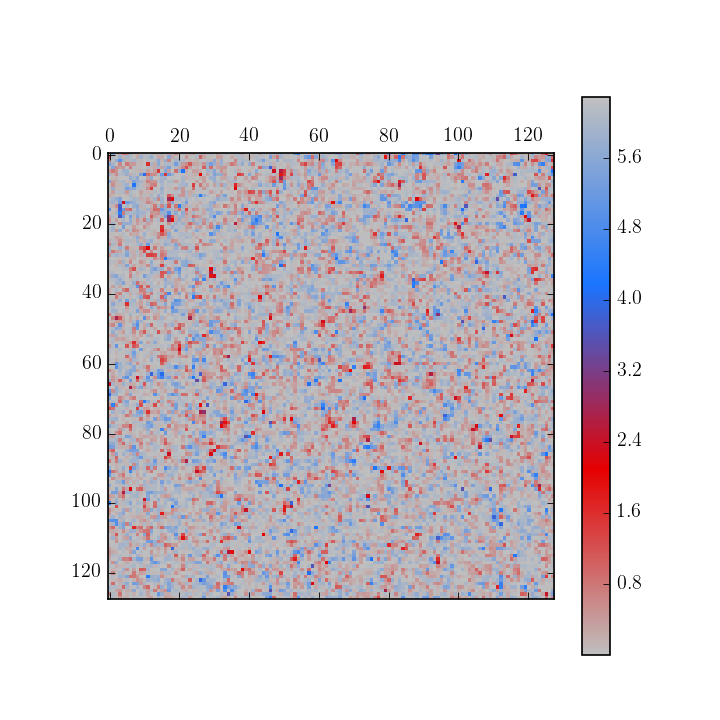

<IPython.core.display.Javascript object>


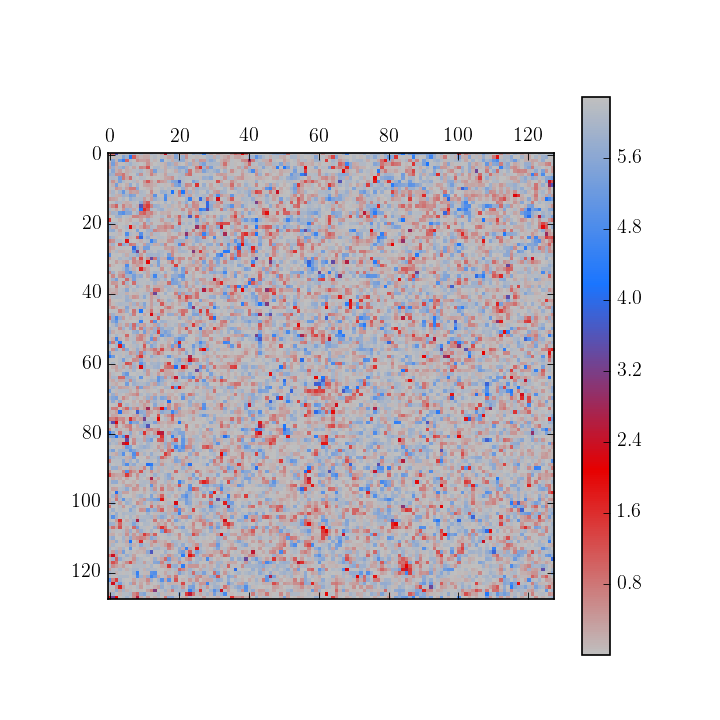

In [311]:
plt.matshow((dat[0])%(2*np.pi), cmap=anglemap);plt.colorbar()
plt.matshow(dat[-1]%(2*np.pi), cmap=anglemap);plt.colorbar()

<IPython.core.display.Javascript object>


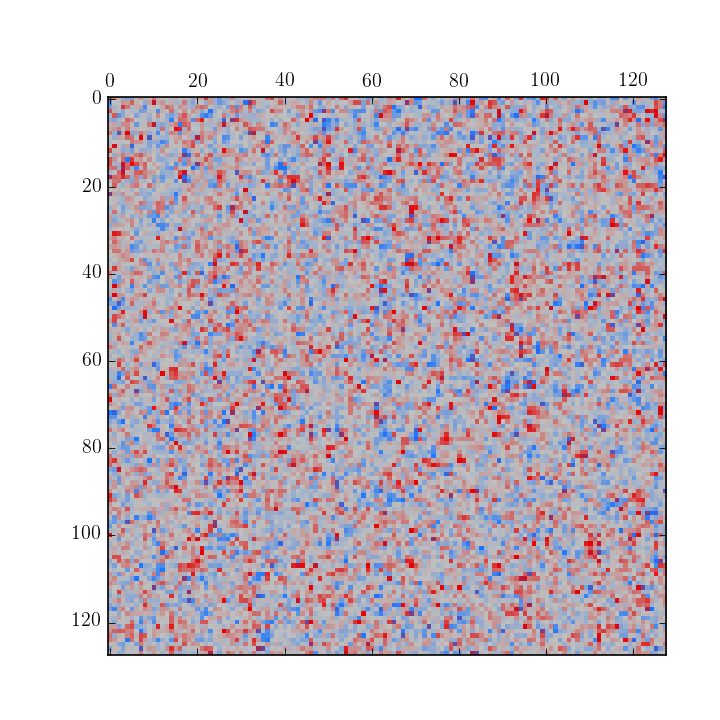

In [315]:
plt.matshow((dat[1]-dat[0])%(2*np.pi), cmap=anglemap)

In [313]:
1 - np.mean(dat[1] == dat[0])

0.99993896484375

In [310]:
1-np.mean((dat[3] == dat[2]))

1.0